<a href="https://colab.research.google.com/github/eranlaloum/-forecast_products_purchase/blob/main/products_forecast_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Greetings!
> You received this jupyter notebook as we believe this can be a great fit. <br>
> The goal of this notebook is to understand our challenges better <br> and assess your proficiency in python & pandas.

### Several remarks:
* You are welcome to use the internet, consult, and use any available sources.
* There is no time limit, and we do not monitor any versioning or pace. Take your time and have fun.
* The notebook should take up to two hours. If it takes more than that, please reach out.
We tried to create an intriguing assignment. If you have any feedback - we'll be happy to hear.
* A text cell decorated with "👷" will be followed by a code cell you are welcome to fill in.

# **The products recommendation notebook**
The data at hand represents 12,000 bank clients and their monthly financial status.
<br> The data is featured as a tabular schema, where each row contains 48 features.
>The first 24 features are client-level entities such as age, residence country, and the joining channel.
<br>The last 24 features are the **products** the client owns in a specified month (`Status_Dt`).

Our task is to *forecast* which products a client will add or remove next month, given that we have all past information on the client.

# Logistics

In [ ]:
# You will probably need to run this cell twice,
# as google colab has runtime issues after installing some libraries
# (press the "Restart runtime" button in the output cell)
!pip install --upgrade gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0


In [ ]:
# Download and extract the dataset
!rm -rf sample_data
!mkdir data & gdown 1DkOvf0LaRgCVfLEtHXr5ztaHhGN4-tDu -O data/features_products.zip
!unzip data/features_products.zip -d data/features_products
!find . -name "*.zip" ! -iname features_products.zip | while read filename; do unzip -o -d "`dirname "$filename"`" "$filename"; done;
!find . -name "*.zip" -delete

Downloading...
From (original): https://drive.google.com/uc?id=1DkOvf0LaRgCVfLEtHXr5ztaHhGN4-tDu
From (redirected): https://drive.google.com/uc?id=1DkOvf0LaRgCVfLEtHXr5ztaHhGN4-tDu&confirm=t&uuid=332d874c-8bd3-4fd0-9de1-bdfcf9645cc3
To: /content/data/features_products.zip
100% 240M/240M [00:04<00:00, 48.6MB/s]
Archive:  data/features_products.zip
  inflating: data/features_products/sample_submission.csv.zip  
  inflating: data/features_products/test_ver2.csv.zip  
  inflating: data/features_products/train_ver2.csv.zip  
Archive:  ./data/features_products/sample_submission.csv.zip
  inflating: ./data/features_products/sample_submission.csv  
Archive:  ./data/features_products/train_ver2.csv.zip
  inflating: ./data/features_products/train_ver2.csv  
Archive:  ./data/features_products/test_ver2.csv.zip
  inflating: ./data/features_products/test_ver2.csv  


In [ ]:
# Import libraries and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 12)
import warnings
warnings.filterwarnings("ignore")


Populating the interactive namespace from numpy and matplotlib


In [ ]:
# Sample the dataset (We only want to experiment with the data).
limit_rows   = 7000000
df           = pd.read_csv("data/features_products/train_ver2.csv",dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                                                    "indext":str},
                                                     nrows=limit_rows)

In [ ]:
# The original schema was in Spanish. We will rename the columns for readability.
df.columns = ['Status_Dt', 'Cust_ID', 'Emp_Status', 'Cust_Ctry', 'Cust_Sex', 'Age', 'Join_Dt',
                'Is_New_Cust', 'Cust_Since', 'Relship_Status','Lst_Dt_Primary_Cust', 'Cust_Type_Mth_Beg',
                'Cust_Relship_Type_Mth_Beg', 'Residence_Ctry', 'Is_Foreigner', 'Is_Spouse_Emp', 'Join_Channel', 'Deceased_Flg',
                'Address_Type', 'Cust_Province_Cd', 'Cust_Province_Name', 'Cust_Active_Status', 'Gross_HHLD_Income',
                'Cust_Segment', 'Savings_Acct', 'Guarantees', 'Cur_Acct', 'Derivative_Acct', 'Payroll_Acct',
                'Junior_Acct', 'Mas_Particular_Acct', 'Particular_Acct', 'Particular_Plus_Acct', 'Short_Term_Deposits',
                'Med_Term_Deposits', 'Long_Term_Deposits', 'e-Acct', 'Funds', 'Mortgage', 'Pension1', 'Loans',
                'Taxes', 'Credit_Card', 'Securities', 'Home_Acct', 'Payroll', 'Pension2', 'Direct_Debit']

# Sample the dataset (We only want to experiment with the data).
unique_ids   = pd.Series(df["Cust_ID"].unique())
limit_people = int(1.2e4)
unique_id    = unique_ids.sample(n=limit_people)
df           = df[df.Cust_ID.isin(unique_id)]

In [ ]:
# Cast relevant data types
date_attribs = ['Status_Dt', 'Join_Dt', 'Lst_Dt_Primary_Cust']
for attrib in date_attribs:
    df[attrib] = pd.to_datetime(df[attrib],format="%Y-%m-%d")
numeric_attribs = ['Age', 'Is_New_Cust', 'Cust_Since', 'Relship_Status', 'Address_Type', 'Cust_Active_Status']
for attrib in numeric_attribs:
    df[attrib] = pd.to_numeric(df[attrib], downcast='integer',errors='coerce')

# Exploratory Data Analysis 👷

### The task in this phase is to analyze the data.
#### Think of at least one EDA plot that helps understand the underlying statistics. Explain your choice.
*Remember - The goal is to predict which items customers will add in the following month.*

> You are not obligated to submit all plots and analyses you perform.
<br>Try to understand the data as good as possible.


In [ ]:
###### Your Code Here ######
df.head()

,Status_Dt,Cust_ID,Emp_Status,Cust_Ctry,Cust_Sex,Age,Join_Dt,Is_New_Cust,Cust_Since,Relship_Status,...,Mortgage,Pension1,Loans,Taxes,Credit_Card,Securities,Home_Acct,Payroll,Pension2,Direct_Debit
43,2015-01-28,1050680,N,ES,V,53.0,2012-08-10,0.0,35.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
85,2015-01-28,1050516,N,ES,H,24.0,2012-08-10,0.0,35.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
254,2015-01-28,1050732,N,ES,H,23.0,2012-08-10,0.0,35.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
498,2015-01-28,1050464,N,ES,H,24.0,2012-08-10,0.0,35.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
558,2015-01-28,1050306,N,ES,H,23.0,2012-08-10,0.0,35.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


**Check for nulls and unique values**

In [ ]:
# a function to show statistics about nulls and unique values
def report_table(dataset):
        dtypes=dataset.dtypes
        nulls = dataset.isnull().sum()
        per = nulls/dataset.isnull().count()*100
        nunique = dataset.nunique()
        df_type_nulls =pd.concat([dtypes, nulls,per, nunique], axis=1)
        df_type_nulls.rename(columns = {0: 'dtypes', 1: 'nulls',  2: 'nulls in percentage', 3:'uniques'}, inplace = True)

        return df_type_nulls

In [ ]:
report_table(df)

,dtypes,nulls,nulls in percentage,uniques
Status_Dt,datetime64[ns],0,0.000000,10
Cust_ID,int64,0,0.000000,12000
Emp_Status,object,376,0.407911,4
Cust_Ctry,object,376,0.407911,22
Cust_Sex,object,376,0.407911,2
Age,float64,376,0.407911,108
Join_Dt,datetime64[ns],376,0.407911,3989
Is_New_Cust,float64,376,0.407911,2
Cust_Since,float64,376,0.407911,249
Relship_Status,float64,376,0.407911,2


**We can see that there are some coulmns with nulls and many columns with only one value, which are not contributing to the model, therefore we will drop them**. for example: Lst_Dt_Primary_Cust, Is_Spouse_Emp and Address_Type. also, there are multiple columns in which there are some missing values, and we will fill them by median or most common value for each column, depend on the column type. **In addition, we can see that there are missing values in the labels (around 0.2%)** therefore we'll remove the rows with the missing labels as well.I prefer to remove the rows and to not to complete the labels manuall, since I want to keep the data close to its original state.

In [ ]:
# Remove rows with missing values in 'feature1' and 'feature2'
df = df.dropna(subset=['Payroll', 'Pension2'])

let's view the histograms and the corelation matrix in order to see if there are connections between some features and to view the distribution of the numerical columns:

# **Hisograms- numeical features**

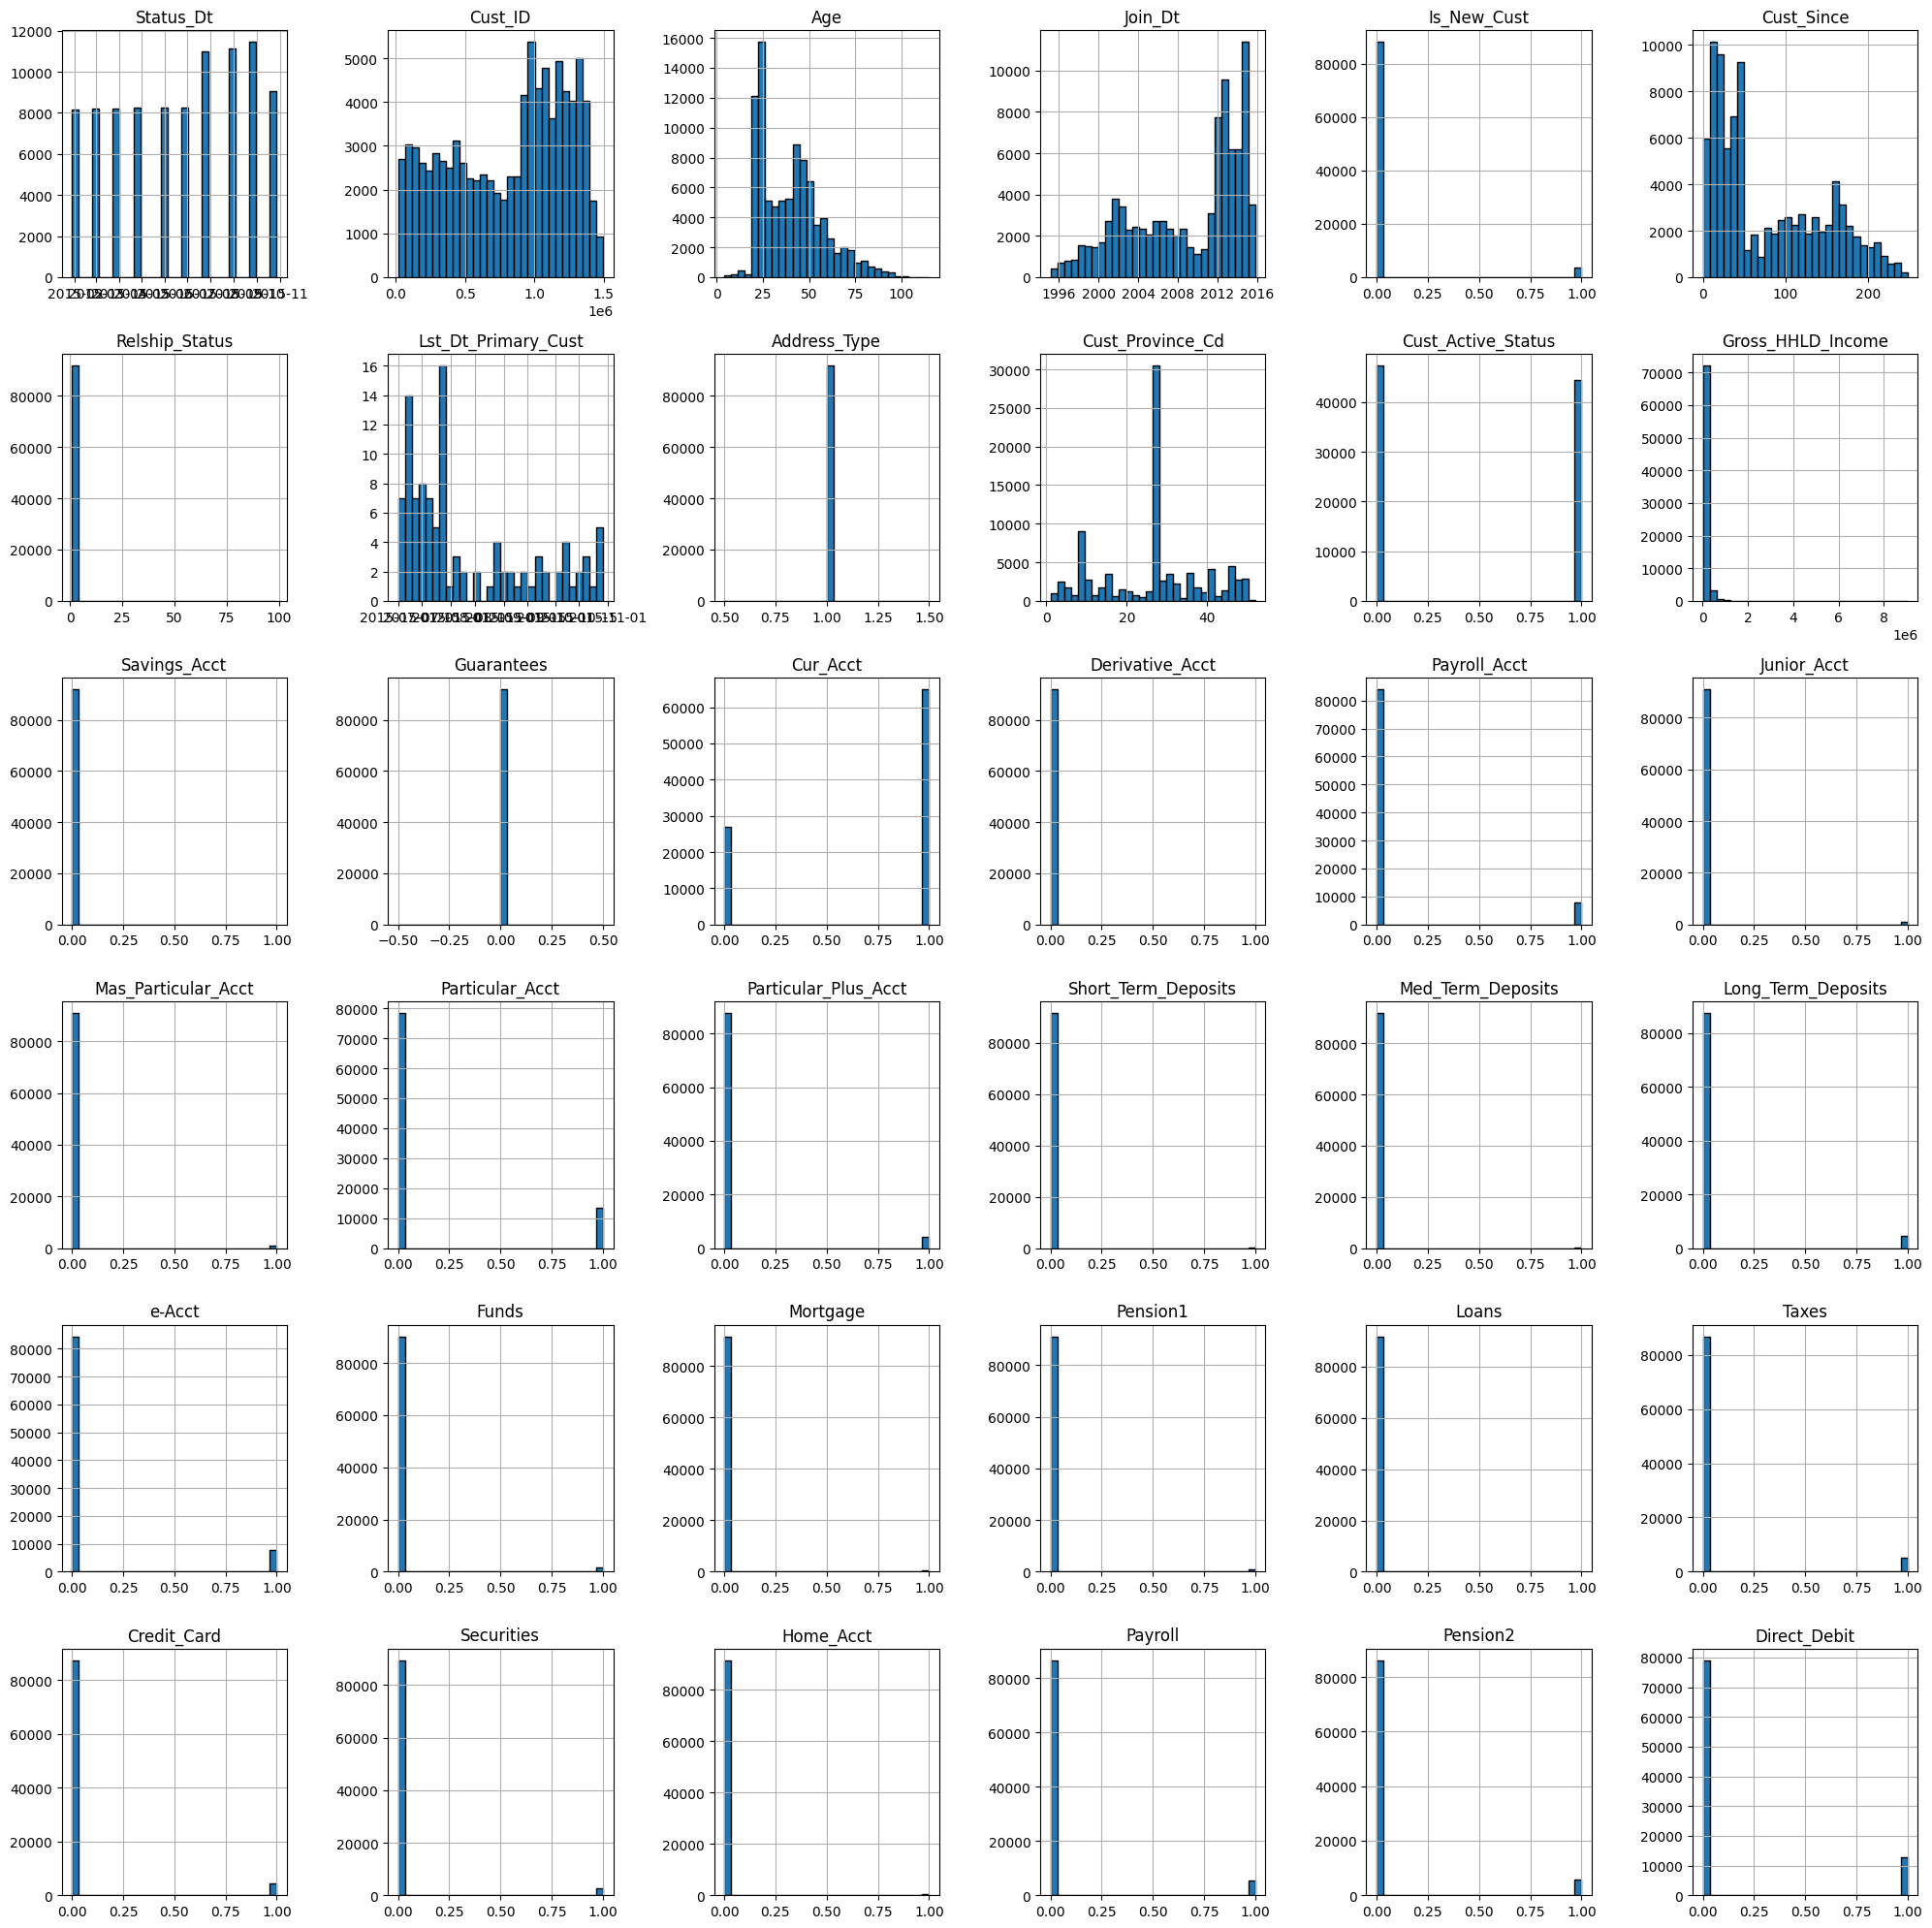

In [ ]:
# Plot histograms for all features
df.hist(figsize=(20, 20), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

# **Correlation matrix- numerical features**

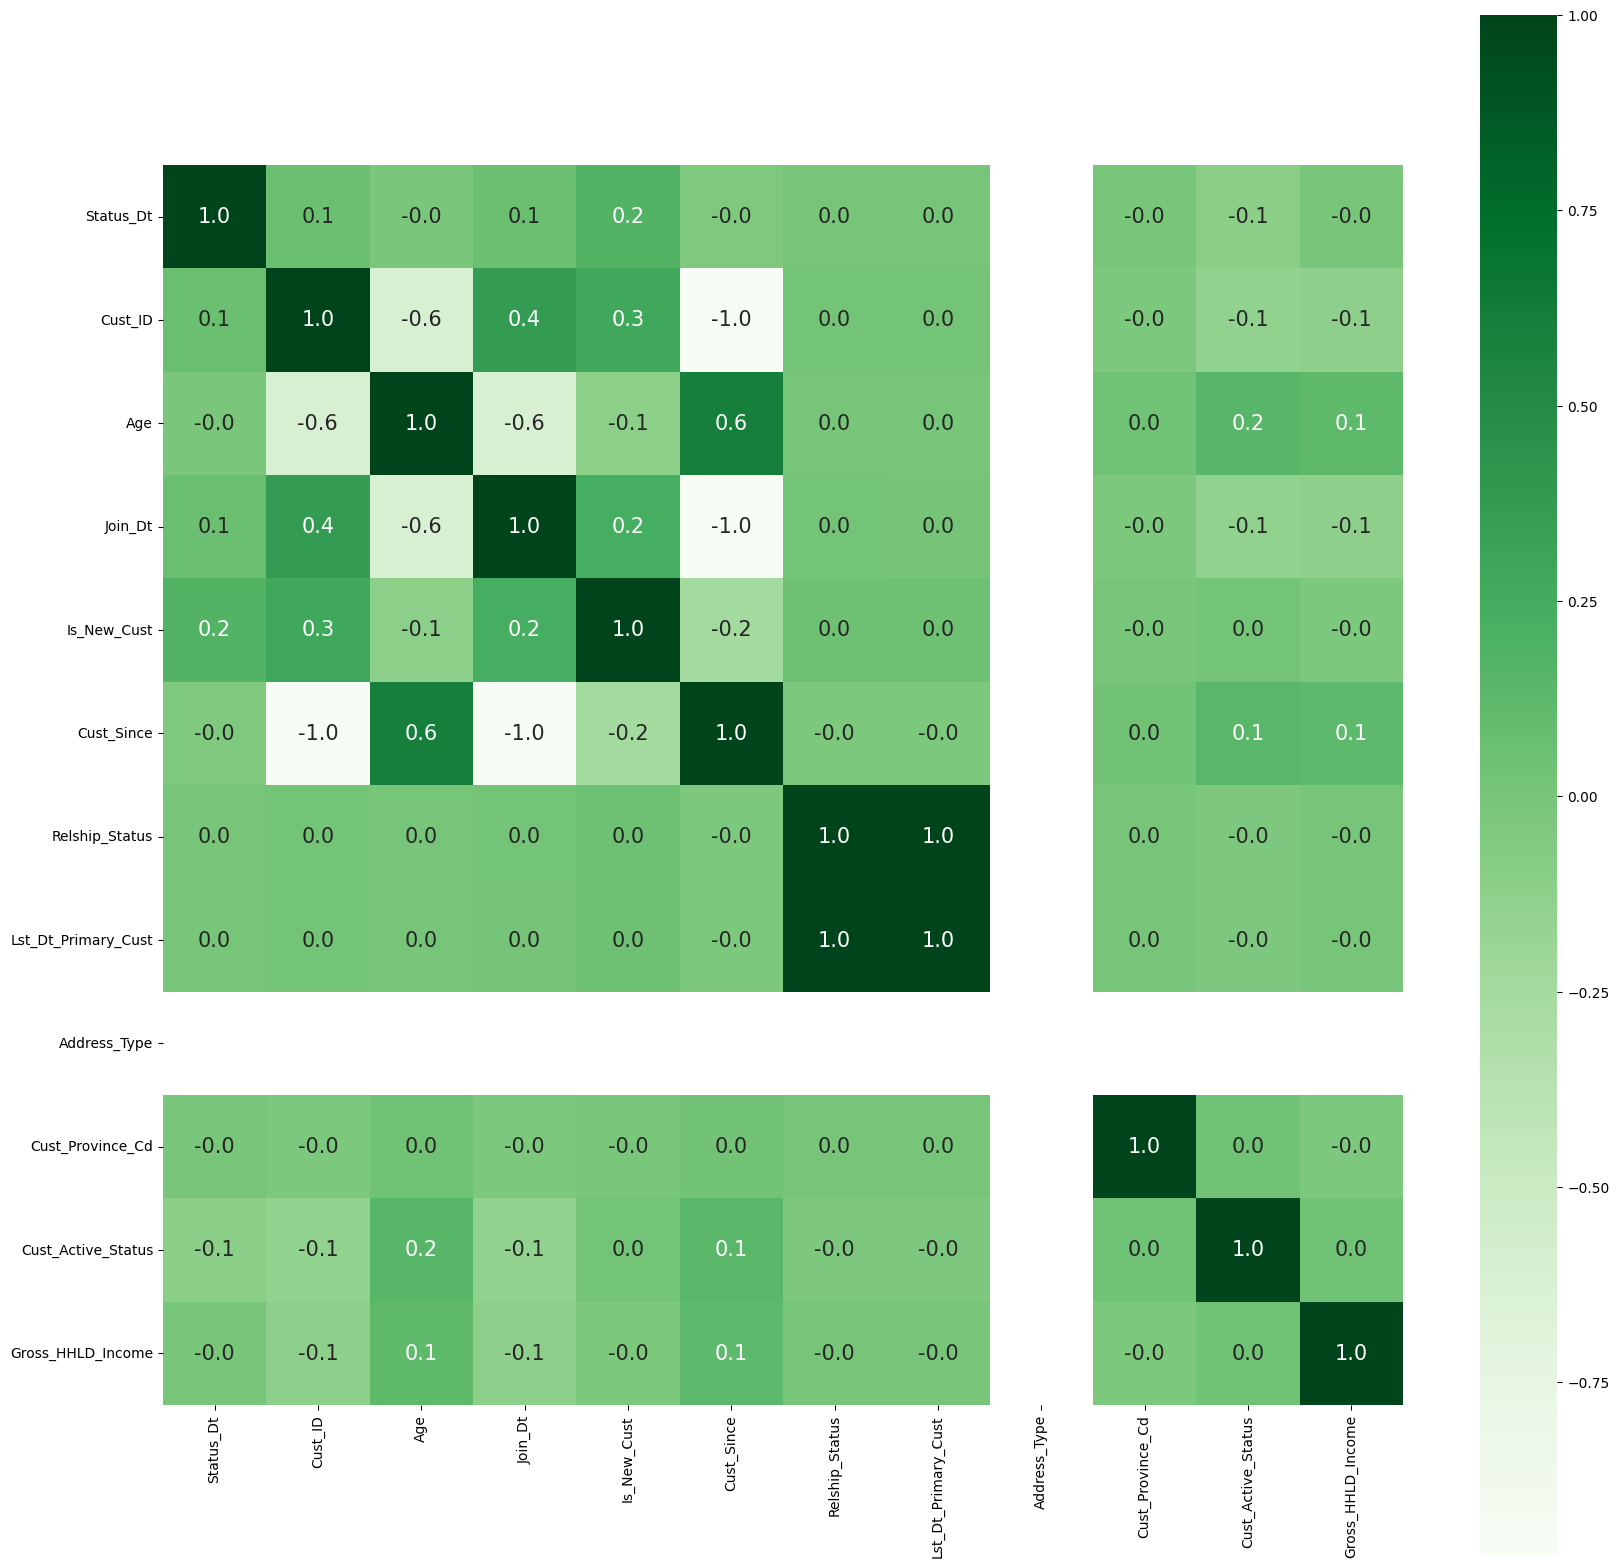

In [ ]:
# Selecting the first 24 columns (features)
df_subset = df.iloc[:, :24]

# Plotting heatmap
plt.figure(figsize=(20,20))
corr = df_subset.loc[:, df_subset.dtypes!=object].corr()
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

we can see that there isn't a strong corelation between the features, so we don't need to remove any of them in this time. If there was a correlation between a couple of features, we could remove some of them, since they were not necessary.

In [ ]:
df.head()

,Status_Dt,Cust_ID,Emp_Status,Cust_Ctry,Cust_Sex,Age,Join_Dt,Is_New_Cust,Cust_Since,Relship_Status,...,Mortgage,Pension1,Loans,Taxes,Credit_Card,Securities,Home_Acct,Payroll,Pension2,Direct_Debit
43,2015-01-28,1050680,N,ES,V,53.0,2012-08-10,0.0,35.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
85,2015-01-28,1050516,N,ES,H,24.0,2012-08-10,0.0,35.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
254,2015-01-28,1050732,N,ES,H,23.0,2012-08-10,0.0,35.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
498,2015-01-28,1050464,N,ES,H,24.0,2012-08-10,0.0,35.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
558,2015-01-28,1050306,N,ES,H,23.0,2012-08-10,0.0,35.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


# **Bar plots- categorical features**

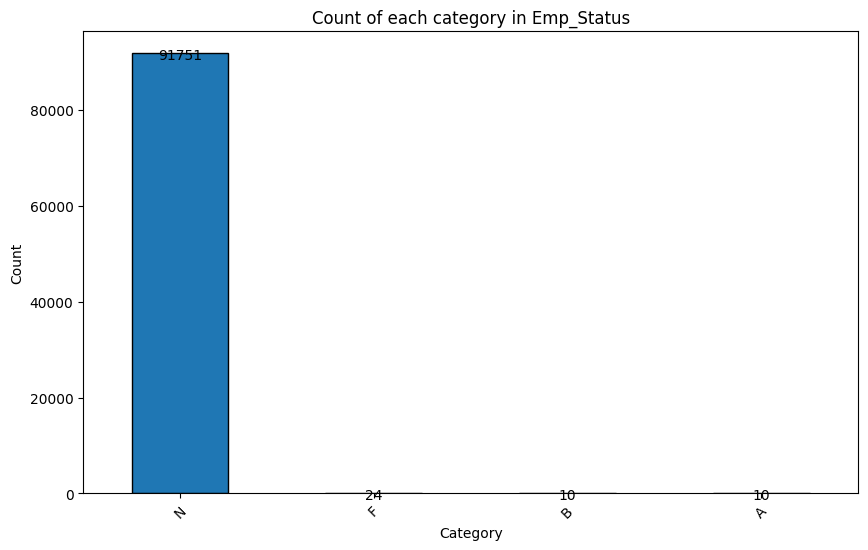

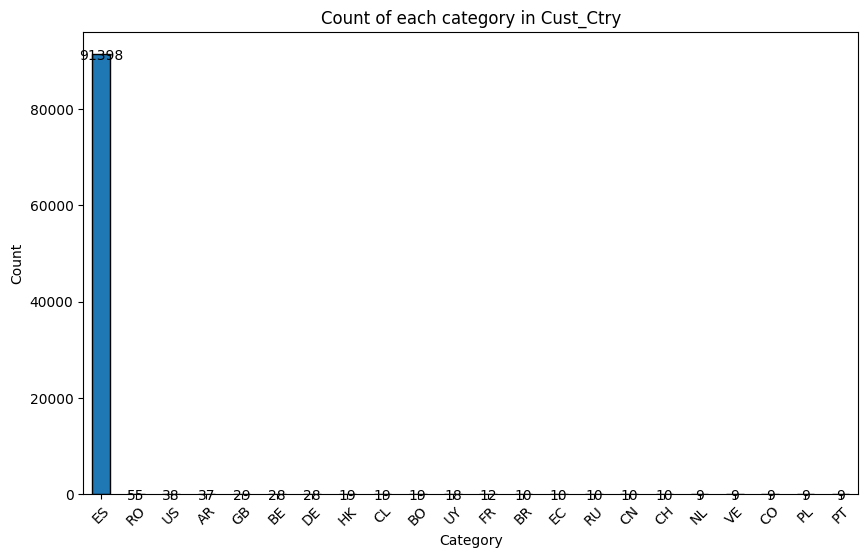

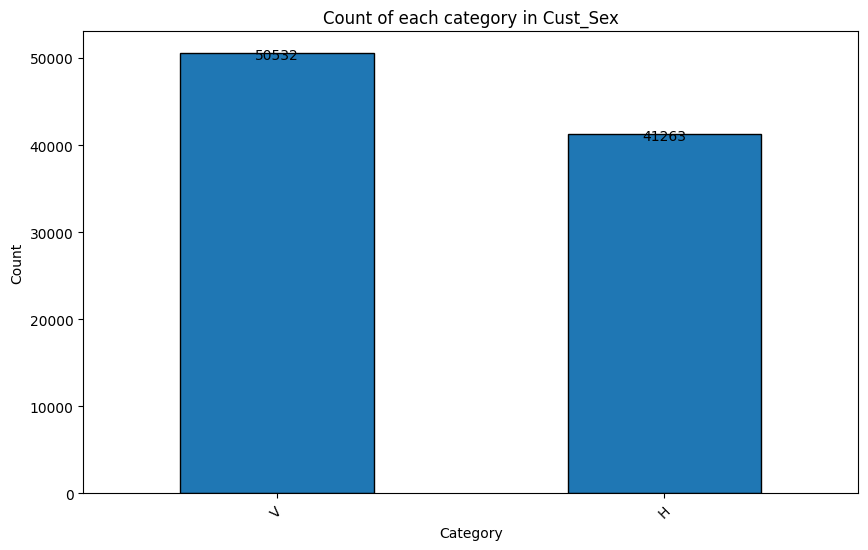

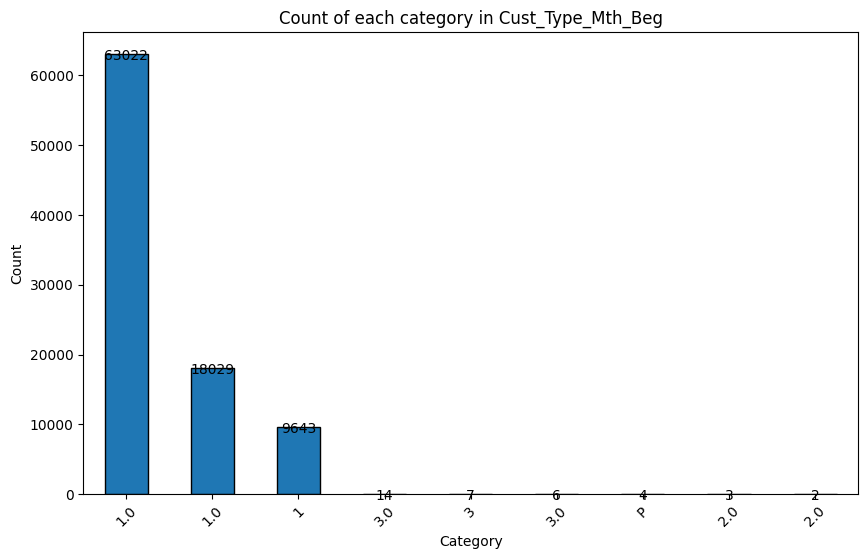

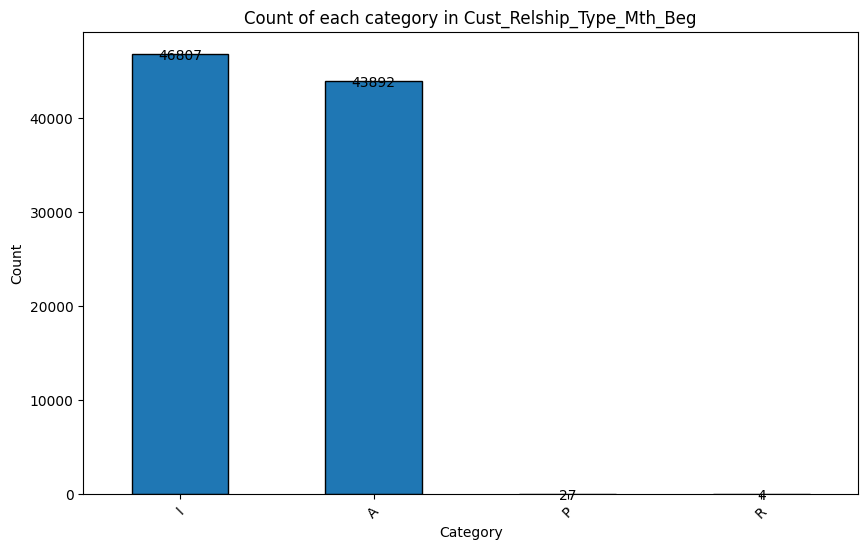

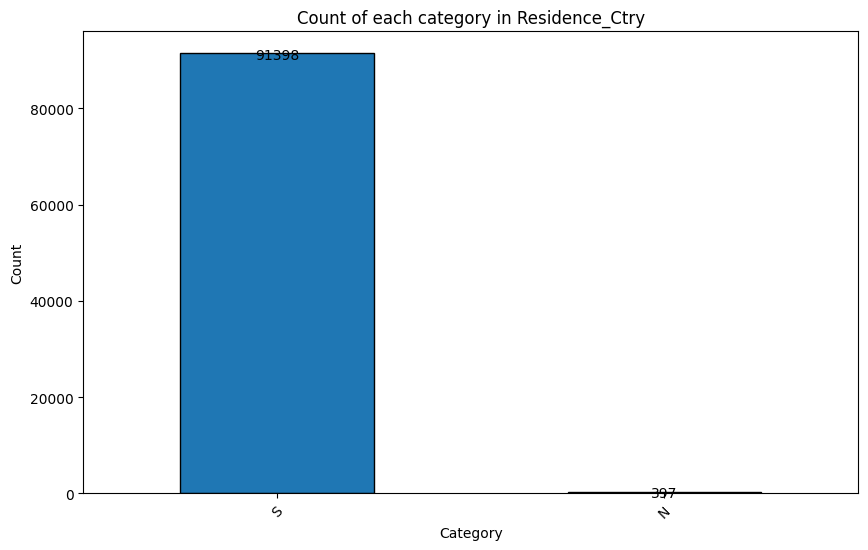

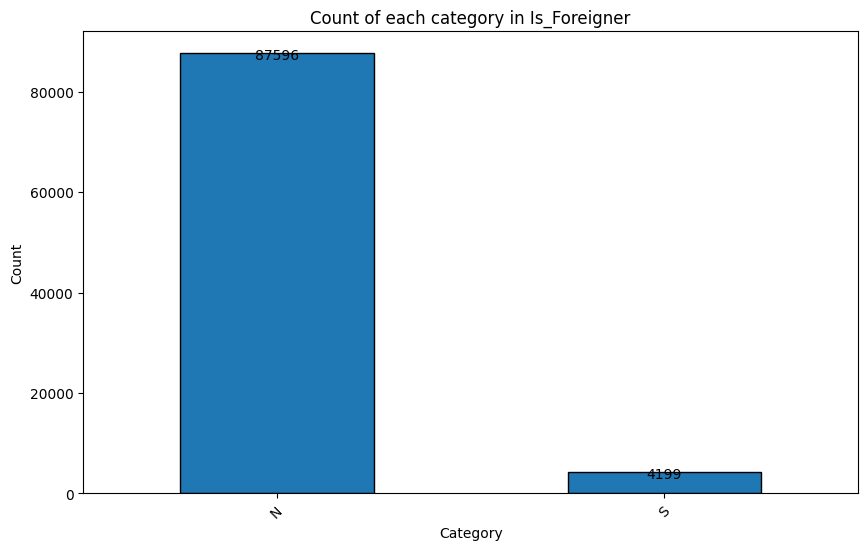

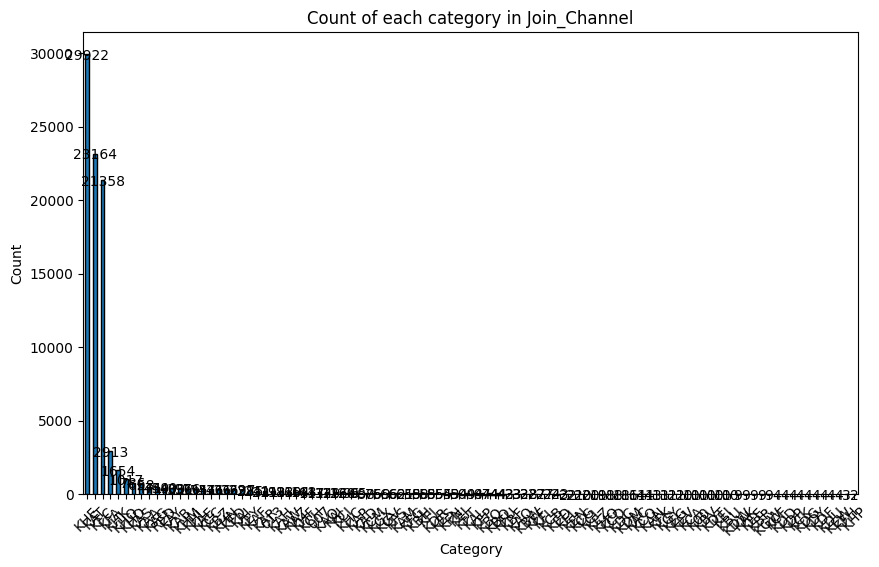

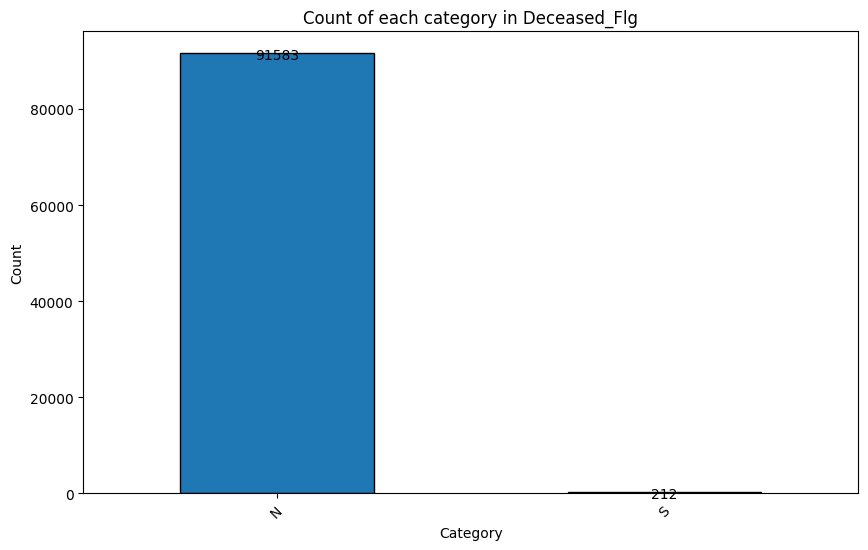

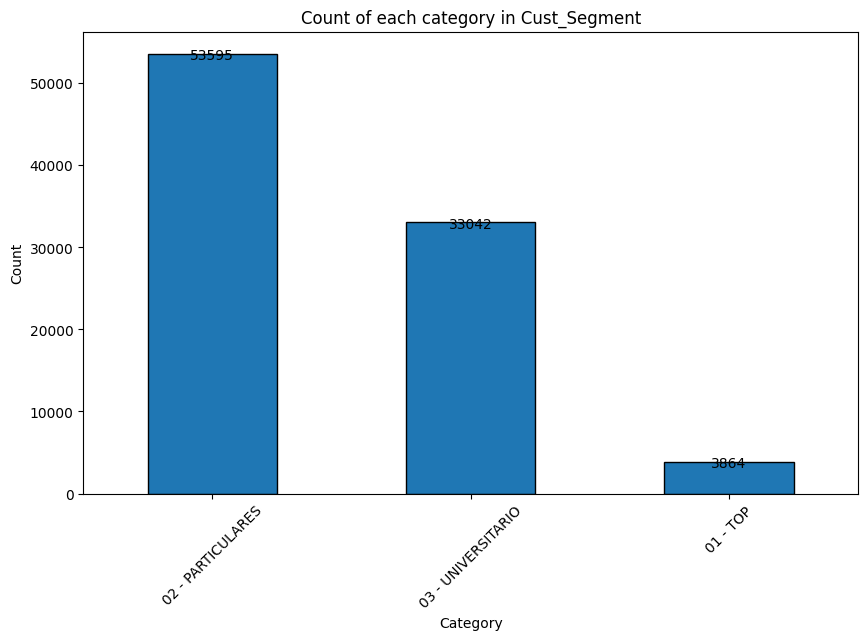

In [ ]:
# Identify categorical features
categorical_features = ['Emp_Status', 'Cust_Ctry', 'Cust_Sex', 'Cust_Type_Mth_Beg',
                        'Cust_Relship_Type_Mth_Beg', 'Residence_Ctry', 'Is_Foreigner',
                        'Join_Channel', 'Deceased_Flg', 'Cust_Segment']

# Create bar plots for each categorical feature with counts centered above each bar
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    ax = df[feature].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f'Count of each category in {feature}')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Add counts centered above each bar
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='center_baseline')

    plt.show()

as we can see, in the categorical features there are multiple columns in which the majority class contains almost 99% of the samples, which indicates that they are very imbalanced, **therefore we will consider if to remove these kind of columns, such as: Emp_Status, Cust_Ctry etc**

# Let's get down, let's get down to business! 🕺💃 👷

After understanding our data better, we would like to train a model to predict the following products a client is about to add or remove.

The development will be segmented into *three* steps.

1.   Create a label vector for each month:
<br>The label vector for each `<client, date>` is the *difference* between the products the client holds in `<date>` and the products of the same client in the consecutive month.<br>
For example, if a client `X` holds a credit card, and does not have a loan or a savings account in March 2019 (translates to the vector `[1,0,0]`) and canceled the credit card in April 2019 but opened a savings account (translates to the vector `[0,0,1]`) - The label for `X, March 2019` will be `[-1,0,1].` <br><br>

2.   Use Feature engineering and Feature selection methods to enrich the training dataset.

3. Use any relevant classification algorithm to predict the shift between consecutive months.



## Create labels

In [ ]:
# Create a label feature vector per <Cust_ID,Status_Dt>
# The label vector will be of length 27 and will represent the change in products between consecutive months
# Create a `next_data_label` dataframe with the following columns:
# ['Cust_ID','Status_Dt', 'Status_Dt_shifted', ... 24 difference product difference label columns ...]
# The name of each label column will be the original column name with the added suffix '_change`
# e.g `Funds_change`.

###### Your Code Here ######
# Ensure the dataframe is sorted by Cust_ID and Status_Dt
df = df.sort_values(by=['Cust_ID', 'Status_Dt'])

# List of product columns (the last 24 columns in your dataframe)
product_columns = ['Savings_Acct', 'Guarantees', 'Cur_Acct', 'Derivative_Acct', 'Payroll_Acct',
                   'Junior_Acct', 'Mas_Particular_Acct', 'Particular_Acct', 'Particular_Plus_Acct',
                   'Short_Term_Deposits', 'Med_Term_Deposits', 'Long_Term_Deposits', 'e-Acct', 'Funds',
                   'Mortgage', 'Pension1', 'Loans', 'Taxes', 'Credit_Card', 'Securities', 'Home_Acct',
                   'Payroll', 'Pension2', 'Direct_Debit']

# Create a shifted version of the dataframe to get next month's data
df_shifted = df.groupby('Cust_ID').shift(-1)

# Add suffix to the shifted columns to indicate they are from the next month
df_shifted = df_shifted.add_suffix('_shifted')

# Concatenate the original dataframe with the shifted dataframe
df_combined = pd.concat([df, df_shifted], axis=1)

# Initialize an empty list to store the change columns
change_columns = []

# Calculate the difference for each product column
for col in product_columns:
    change_col_name = f"{col}_change"
    df_combined[change_col_name] = df_combined[col + '_shifted'] - df_combined[col]
    change_columns.append(change_col_name)

# Select the relevant columns for the next_data_label dataframe
next_data_label = df_combined[['Cust_ID', 'Status_Dt', 'Status_Dt_shifted'] + change_columns]

# Drop rows where Status_Dt_shifted is NaN (these are the last rows for each customer where there is no next month data)
next_data_label = next_data_label.dropna(subset=['Status_Dt_shifted'])

In [ ]:
# Because we only care about behavioural changes, we filter rows with no product change in the consecutive month.
trainable_objects = next_data_label.iloc[:,3:].any(axis=1).to_numpy().nonzero()[0]
next_data_label_relevant = next_data_label.iloc[trainable_objects]

In [ ]:
next_data_label_relevant.head()

,Cust_ID,Status_Dt,Status_Dt_shifted,Savings_Acct_change,Guarantees_change,Cur_Acct_change,Derivative_Acct_change,Payroll_Acct_change,Junior_Acct_change,Mas_Particular_Acct_change,...,Mortgage_change,Pension1_change,Loans_change,Taxes_change,Credit_Card_change,Securities_change,Home_Acct_change,Payroll_change,Pension2_change,Direct_Debit_change
417169,16241,2015-01-28,2015-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
836024,16241,2015-02-28,2015-03-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1674364,16785,2015-03-28,2015-04-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2092587,16785,2015-04-28,2015-05-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
3565393,16785,2015-06-28,2015-07-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Create features

#### Feature engineering 👨‍🔧 📏 📝 📊
Feature engineering is a crucial part of working with tabular data.
*italicized text*
We love new libraries and papers and try to be up-to-date as much as possible here at Insait.

Use any feature engineering method or library you know and love, and create new features to enrich your data.
You can choose to do automatic feature engineering or knowledge-based by manually thinking on logical correlations.

In this section, I'll create some features using feature engineering methods:

**first let's drop drop the columns that has almost 99% nulls or has uniques values** **bold text**

In [ ]:
# Remove columns with 99% null values or only one value
enriched_df = df.drop(columns=['Lst_Dt_Primary_Cust', 'Is_Spouse_Emp','Address_Type'])

In [ ]:
enriched_df.head()

,Status_Dt,Cust_ID,Emp_Status,Cust_Ctry,Cust_Sex,Age,Join_Dt,Is_New_Cust,Cust_Since,Relship_Status,...,Mortgage,Pension1,Loans,Taxes,Credit_Card,Securities,Home_Acct,Payroll,Pension2,Direct_Debit
416930,2015-01-28,16053,N,ES,V,58.0,1995-02-20,0.0,245.0,1.0,...,0,1,0,0,0,0,0,0.0,0.0,0
836261,2015-02-28,16053,N,ES,V,58.0,1995-02-20,0.0,245.0,1.0,...,0,1,0,0,0,0,0,0.0,0.0,0
1673998,2015-03-28,16053,N,ES,V,58.0,1995-02-20,0.0,245.0,1.0,...,0,1,0,0,0,0,0,0.0,0.0,0
2092221,2015-04-28,16053,N,ES,V,58.0,1995-02-20,0.0,245.0,1.0,...,0,1,0,0,0,0,0,0.0,0.0,0
2933685,2015-05-28,16053,N,ES,V,58.0,1995-02-20,0.0,245.0,1.0,...,0,1,0,0,0,0,0,0.0,0.0,0


In [ ]:
# Ensure the dataframe is sorted by Cust_ID and Status_Dt
enriched_df = enriched_df.sort_values(by=['Cust_ID', 'Status_Dt'])

# List of product columns (the last 24 columns in your dataframe)
product_columns = ['Savings_Acct', 'Guarantees', 'Cur_Acct', 'Derivative_Acct', 'Payroll_Acct',
                   'Junior_Acct', 'Mas_Particular_Acct', 'Particular_Acct', 'Particular_Plus_Acct',
                   'Short_Term_Deposits', 'Med_Term_Deposits', 'Long_Term_Deposits', 'e-Acct', 'Funds',
                   'Mortgage', 'Pension1', 'Loans', 'Taxes', 'Credit_Card', 'Securities', 'Home_Acct',
                   'Payroll', 'Pension2', 'Direct_Debit']

fill null values

In [ ]:
# For numerical features, fill with the median
numerical_features = ['Age', 'Cust_Since', 'Cust_Province_Cd', 'Cust_Active_Status', 'Gross_HHLD_Income']
for column in numerical_features:
    enriched_df[column].fillna(enriched_df[column].median(), inplace=True)

# For categorical features, fill with the mode
categorical_features = ['Emp_Status', 'Cust_Ctry', 'Cust_Sex', 'Cust_Type_Mth_Beg',
                        'Cust_Relship_Type_Mth_Beg', 'Residence_Ctry', 'Is_Foreigner',
                        'Join_Channel', 'Deceased_Flg', 'Cust_Province_Name', 'Cust_Segment']
for column in categorical_features:
    enriched_df[column].fillna(enriched_df[column].mode()[0], inplace=True)

# For binary features, fill with the mode (most likely either 0 or 1)
binary_features = ['Is_New_Cust', 'Relship_Status']
for column in binary_features:
    enriched_df[column].fillna(enriched_df[column].mode()[0], inplace=True)

# For date features, fill with the most common date (mode)
date_features = ['Join_Dt']
for column in date_features:
    most_common_date = df[column].mode()[0]
    df[column].fillna(most_common_date, inplace=True)

let's create new features

In [ ]:
# 1. Temporal Features
enriched_df['Year'] = enriched_df['Status_Dt'].dt.year
enriched_df['Month'] = enriched_df['Status_Dt'].dt.month
enriched_df['Day'] = enriched_df['Status_Dt'].dt.day
enriched_df['DayOfWeek'] = enriched_df['Status_Dt'].dt.dayofweek

In [ ]:
# 2. Client Behavior Features
enriched_df['Client_Tenure'] = (enriched_df['Status_Dt'] - df['Join_Dt']).dt.days

In [ ]:
# 3. Aggregated Features
enriched_df['Total_Products'] = enriched_df[product_columns].sum(axis=1)

In [ ]:
# 4. Interaction Features
enriched_df['Income_per_Product'] = enriched_df['Gross_HHLD_Income'] / (enriched_df['Total_Products'] + 1)  # Adding 1 to avoid division by zero

In [ ]:
# Drop product-related columns (columns 24-48)
enriched_df = enriched_df.drop(columns=product_columns)

one hot encoding for categorical features, and scaling for numerical features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Perform one-hot encoding for categorical features
enriched_df = pd.get_dummies(enriched_df, columns=categorical_features, dtype=float)

# Standardize all numerical features, including the new ones
numerical_features += ['Client_Tenure', 'Total_Products', 'Income_per_Product', 'Year', 'Month', 'Day', 'DayOfWeek']
scaler = StandardScaler()
enriched_df[numerical_features] = scaler.fit_transform(enriched_df[numerical_features])

In [ ]:
enriched_df.head()

,Status_Dt,Cust_ID,Age,Join_Dt,Is_New_Cust,Cust_Since,Relship_Status,Cust_Province_Cd,Cust_Active_Status,Gross_HHLD_Income,...,Cust_Province_Name_TARRAGONA,Cust_Province_Name_TERUEL,Cust_Province_Name_TOLEDO,Cust_Province_Name_VALENCIA,Cust_Province_Name_VALLADOLID,Cust_Province_Name_ZAMORA,Cust_Province_Name_ZARAGOZA,Cust_Segment_01 - TOP,Cust_Segment_02 - PARTICULARES,Cust_Segment_03 - UNIVERSITARIO
416930,2015-01-28,16053,1.037665,1995-02-20,0.0,2.487446,1.0,0.109145,1.033833,-0.248563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
836261,2015-02-28,16053,1.037665,1995-02-20,0.0,2.487446,1.0,0.109145,1.033833,-0.248563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1673998,2015-03-28,16053,1.037665,1995-02-20,0.0,2.487446,1.0,0.109145,1.033833,-0.248563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2092221,2015-04-28,16053,1.037665,1995-02-20,0.0,2.487446,1.0,0.109145,1.033833,-0.248563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2933685,2015-05-28,16053,1.037665,1995-02-20,0.0,2.487446,1.0,0.109145,1.033833,-0.248563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Ensure binary features are in 0/1 format
binary_features = ['Is_New_Cust', 'Relship_Status', 'Cust_Active_Status']
enriched_df[binary_features] = enriched_df[binary_features].apply(lambda x: x.astype(int))

# Convert dates to datetime if not already done
enriched_df['Join_Dt'] = pd.to_datetime(enriched_df['Join_Dt'])
enriched_df['Status_Dt'] = pd.to_datetime(enriched_df['Status_Dt'])

In [ ]:
# Drop original date columns
enriched_df = enriched_df.drop(columns=['Join_Dt'])

In [ ]:
null_mask = enriched_df.isnull().any(axis=1)
null_rows = enriched_df[null_mask]
null_rows

,Status_Dt,Cust_ID,Age,Is_New_Cust,Cust_Since,Relship_Status,Cust_Province_Cd,Cust_Active_Status,Gross_HHLD_Income,Year,...,Cust_Province_Name_TARRAGONA,Cust_Province_Name_TERUEL,Cust_Province_Name_TOLEDO,Cust_Province_Name_VALENCIA,Cust_Province_Name_VALLADOLID,Cust_Province_Name_ZAMORA,Cust_Province_Name_ZARAGOZA,Cust_Segment_01 - TOP,Cust_Segment_02 - PARTICULARES,Cust_Segment_03 - UNIVERSITARIO


as we can see, there are no rows with nulls. let's proceed to the feature selection

#### Feature Selection
The financial datasets we use at Insait have hundreds of columns.

Training on such massive datasets lead to bad performance and extended training time.

Suggest a feature selection method (Using an open-source library is welcomed), and filter the provided dataset

**Let's use variance threshold in order to select features with high variance.**
The reason to choose features with high variance is because we assume that features with a higher variance may contain more useful information


In [ ]:
# Name the new dataset enriched_selected_df
###### Your Code Here ######

# columns_to_remove = ['Status_Dt']
# enriched_selected_df = enriched_df.drop(columns=columns_to_remove)

# Calculate the variance for each feature
variance = enriched_df.loc[:, enriched_df.columns != 'Status_Dt'].var()

# Identify features with low variance (e.g., less than a threshold)
low_variance_features = variance[variance < 0.01].index.tolist()

print("Low variance features:", low_variance_features)

# Optionally, drop low-variance features
enriched_selected_df = enriched_df.drop(columns=low_variance_features)

Low variance features: ['Year', 'Day', 'Emp_Status_A', 'Emp_Status_B', 'Emp_Status_F', 'Emp_Status_N', 'Cust_Ctry_AR', 'Cust_Ctry_BE', 'Cust_Ctry_BO', 'Cust_Ctry_BR', 'Cust_Ctry_CH', 'Cust_Ctry_CL', 'Cust_Ctry_CN', 'Cust_Ctry_CO', 'Cust_Ctry_DE', 'Cust_Ctry_EC', 'Cust_Ctry_ES', 'Cust_Ctry_FR', 'Cust_Ctry_GB', 'Cust_Ctry_HK', 'Cust_Ctry_NL', 'Cust_Ctry_PL', 'Cust_Ctry_PT', 'Cust_Ctry_RO', 'Cust_Ctry_RU', 'Cust_Ctry_US', 'Cust_Ctry_UY', 'Cust_Ctry_VE', 'Cust_Type_Mth_Beg_2.0', 'Cust_Type_Mth_Beg_3.0', 'Cust_Type_Mth_Beg_2.0', 'Cust_Type_Mth_Beg_3', 'Cust_Type_Mth_Beg_3.0', 'Cust_Type_Mth_Beg_P', 'Cust_Relship_Type_Mth_Beg_P', 'Cust_Relship_Type_Mth_Beg_R', 'Residence_Ctry_N', 'Residence_Ctry_S', 'Join_Channel_007', 'Join_Channel_013', 'Join_Channel_K00', 'Join_Channel_KAA', 'Join_Channel_KAB', 'Join_Channel_KAC', 'Join_Channel_KAD', 'Join_Channel_KAE', 'Join_Channel_KAF', 'Join_Channel_KAG', 'Join_Channel_KAH', 'Join_Channel_KAI', 'Join_Channel_KAJ', 'Join_Channel_KAK', 'Join_Channel_KAL

In [ ]:
# 2. Merge the enriched_selected_df with the labels (the products difference vector <next_data_label_relevant>)
# Call the final df `features_labels`

###### Your Code Here ######
# Ensure both dataframes are sorted by 'Cust_ID' and 'Status_Dt'
enriched_selected_df = enriched_selected_df.sort_values(by=['Cust_ID', 'Status_Dt'])
next_data_label_relevant = next_data_label_relevant.sort_values(by=['Cust_ID', 'Status_Dt'])

# Merge the dataframes to ensure rows are matched by 'Cust_ID' and 'Status_Dt'
features_labels = enriched_selected_df.merge(next_data_label_relevant, on=['Cust_ID', 'Status_Dt'])



## Modeling

In [ ]:
# Beware! a random train,test split will not work here, as we will leak data to future occurances.
# We will take samples where the next month in the last month in the db as our testing data, and the rest as train.

next_date_last = (features_labels.Status_Dt_shifted == features_labels.Status_Dt_shifted.max())
train, test = features_labels[next_date_last], features_labels[~next_date_last]

## Training
### It's the final countdown 🍒👷

In [ ]:
# We provide below a helper to preprocess the training features before entering to the model.
from sklearn.preprocessing import LabelEncoder
def prepare_for_model(df):
  features = df.loc[:,~df.columns.str.endswith('_change')].drop(['Cust_ID','Status_Dt'],axis=1)
  labels = df.loc[:,df.columns.str.endswith('_change')]
  features.loc[:,features.dtypes=='object'] = features.loc[:,features.dtypes=='object'].astype('category')
  features = features.drop(['Status_Dt_shifted'],axis=1)
  # features = features.drop(['Join_Dt','Status_Dt_shifted','Lst_Dt_Primary_Cust'],axis=1) # I already removd them
  # features['Cust_Type_Mth_Beg'] = pd.to_numeric(features.Cust_Type_Mth_Beg, errors='coerce') # it's not on my model

  for column in features.columns[features.dtypes == 'category']:
    features[column] = LabelEncoder().fit_transform(features[column])
  return features, labels

train_features, train_labels = prepare_for_model(train)
test_features, test_labels = prepare_for_model(test)

# **Algorithms used: decision tree & random forest**

In [ ]:
# There are several months where a client changed more than one item.
# Thus we are looking at a multioutput classification problem.
# Use any algorithm/ platform/ library you desire and train the above `train_features, train_labels`.
# Test on test_labels
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

###### Your Code Here ######

from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

# Train the RandomForestClassifier model
rf_model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
rf_model.fit(train_features, train_labels)

# Predict on the test set
yhat = rf_model.predict(test_features)


from sklearn.tree import DecisionTreeClassifier

# Train the DecisionTreeClassifier model
dt_model = MultiOutputClassifier(DecisionTreeClassifier(random_state=42, class_weight='balanced'))
dt_model.fit(train_features, train_labels)

# Predict on the test set
yhat2 = dt_model.predict(test_features)


In [ ]:
# Evaluation code - random forest
for idx,col in enumerate(test_labels.columns):
  cm = confusion_matrix(test_labels[col].values,yhat[:,idx])
  cr = classification_report(test_labels[col].values,yhat[:,idx])
  print(f"Label: {col} \nconf\n {cm}, \nreport\n {cr}\n")

Label: Savings_Acct_change 
conf
 [[522]], 
report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       522

    accuracy                           1.00       522
   macro avg       1.00      1.00      1.00       522
weighted avg       1.00      1.00      1.00       522


Label: Guarantees_change 
conf
 [[522]], 
report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       522

    accuracy                           1.00       522
   macro avg       1.00      1.00      1.00       522
weighted avg       1.00      1.00      1.00       522


Label: Cur_Acct_change 
conf
 [[  5  49   2]
 [  4 384   4]
 [  0  27  47]], 
report
               precision    recall  f1-score   support

        -1.0       0.56      0.09      0.15        56
         0.0       0.83      0.98      0.90       392
         1.0       0.89      0.64      0.74        74

    accuracy                           0.84   

In [ ]:
# Evaluation code - random forest
for idx,col in enumerate(test_labels.columns):
  cm = confusion_matrix(test_labels[col].values,yhat2[:,idx])
  cr = classification_report(test_labels[col].values,yhat2[:,idx])
  print(f"Label: {col} \nconf\n {cm}, \nreport\n {cr}\n")

Label: Savings_Acct_change 
conf
 [[522]], 
report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       522

    accuracy                           1.00       522
   macro avg       1.00      1.00      1.00       522
weighted avg       1.00      1.00      1.00       522


Label: Guarantees_change 
conf
 [[522]], 
report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       522

    accuracy                           1.00       522
   macro avg       1.00      1.00      1.00       522
weighted avg       1.00      1.00      1.00       522


Label: Cur_Acct_change 
conf
 [[ 10  39   7]
 [ 46 320  26]
 [  1  28  45]], 
report
               precision    recall  f1-score   support

        -1.0       0.18      0.18      0.18        56
         0.0       0.83      0.82      0.82       392
         1.0       0.58      0.61      0.59        74

    accuracy                           0.72   

**Important note**: I noticed that the precision and recall scores are not great, and it means that the model doesn't know necesarily how to deal with changes over time between the products as I expected. I was afraid to use oversample methods or cross validation such as k-fold in order not to cause data leakage, since in my opinion is the more important.

# This is it!
We hope you enjoyed this notebook.
Please share your thoughts and impressions, and send us a link to your notebook.
Talk to you soon:)